In [14]:
import os, sys
currentdir = os.path.dirname(os.path.realpath('testing_pipeline.ipynb'))
parentdir = os.path.dirname(currentdir)
sys.path.append(parentdir)

from importlib import reload  
import numpy as np
from skimage.io import imread, imshow
import random
import matplotlib.pyplot as plt

from src import pipeline
pipeline = reload(pipeline)

# Unet Mask

In [17]:
path = '../stacking/slice_test'
model = '../weights/model_unet_checkpoint.h5'
INPUT_IMG = '../stacking/stack_img_1/2021-02-18_19-28-42_-3400_-320_5689.jpeg'
OUTPUT_DIR = '../stacking/slice_test'

In [16]:
pipeline.slice_img(INPUT_IMG, OUTPUT_DIR, RESIZE_FACTOR = 0.3,
                  SLICE_HEIGHT = 256, SLICE_WIDTH = 256,
                  ZERO_FRAC_TRESH = 0.8, OVERLAP = 0, PAD = 0, VERBOSE = True)

Directory  ../stacking/slice_test  already exists
dx 256
dy 256
image output: ../stacking/slice_test/slice_2021-02-18_19-28-42_-3400_-320_5689.jpeg_0_0_256_256_0.png
image output: ../stacking/slice_test/slice_2021-02-18_19-28-42_-3400_-320_5689.jpeg_0_256_256_256_0.png
image output: ../stacking/slice_test/slice_2021-02-18_19-28-42_-3400_-320_5689.jpeg_0_512_256_256_0.png
image output: ../stacking/slice_test/slice_2021-02-18_19-28-42_-3400_-320_5689.jpeg_0_728_256_256_0.png
image output: ../stacking/slice_test/slice_2021-02-18_19-28-42_-3400_-320_5689.jpeg_256_0_256_256_0.png
image output: ../stacking/slice_test/slice_2021-02-18_19-28-42_-3400_-320_5689.jpeg_256_256_256_256_0.png
image output: ../stacking/slice_test/slice_2021-02-18_19-28-42_-3400_-320_5689.jpeg_256_512_256_256_0.png
image output: ../stacking/slice_test/slice_2021-02-18_19-28-42_-3400_-320_5689.jpeg_256_728_256_256_0.png
image output: ../stacking/slice_test/slice_2021-02-18_19-28-42_-3400_-320_5689.jpeg_483_0_256_256_0.

In [18]:
imgs, sizes_imgs  = pipeline.get_imgs(path)

In [19]:
pred_masks_t = pipeline.unet_predict(model, imgs, sizes_imgs)

1/1 [==============================] - 2s 2s/step


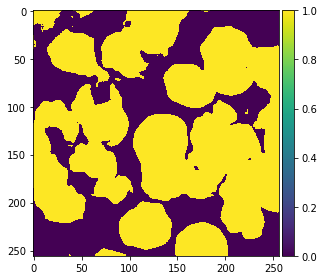

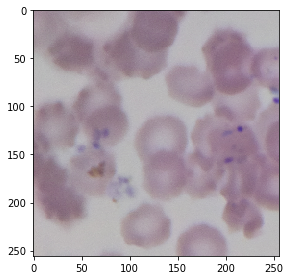

In [22]:
# Perform check on test set
ix = random.randint(0, len(pred_masks_t))
imshow(np.squeeze(pred_masks_t[ix]))
plt.show()
imshow(imgs[ix])
plt.show()